In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') #경고메시지 무시하도록 하는 옵션


In [3]:
pwd

'D:\\AI_14_kjw\\workspace\\day03'

In [4]:
#데이터로드
titanic_df = pd.read_csv("train.csv")

#./ 파일명 앞에 생략, 현재폴더 상대경로
#상대경로 : 현재 위치를 기준으로 이동 ./ 현재위치 ../상위폴더로 이동
#절대경로 : 드라이브위치 처음부터 하위 폴더명까지 모두 다 작성

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
#컬럼별 null값 확인
#.isnull() : 데이터가 있는지 없는지 확인하는 메소드 (데이터가 있으면 F, 없으면 T)

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#나이는 전체 평균값으로 채운다 .fillna(채울값, inplace = True)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

#선실과 정착지는 N으로 채운다
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

#컬럼별 null값확인
print(f"전체 데이터셋의 Null값 개수확인 : \n{titanic_df.isnull().sum()}")


전체 데이터셋의 Null값 개수확인 : 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [8]:
pd.set_option('display.max_rows', 900) #출력결과 모두 볼 수 있도록 설정
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,N,C


In [9]:
#성별 승객수
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
#선실별 승객수
titanic_df['Cabin'].value_counts()

N                  687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
D                    3
F33                  3
E101                 3
F2                   3
B20                  2
E67                  2
C125                 2
E24                  2
B49                  2
B77                  2
D35                  2
C78                  2
C93                  2
C65                  2
B57 B59 B63 B66      2
B5                   2
E121                 2
B51 B53 B55          2
B18                  2
C124                 2
C126                 2
B35                  2
E44                  2
C92                  2
C68                  2
D20                  2
B22                  2
E25                  2
D36                  2
E8                   2
C83                  2
C2                   2
D17                  2
D26                  2
D33                  2
F G73                2
E33                  2
B28                  2
C52        

In [11]:
#정착지별 승객수
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [12]:
#승객별 선실 정보의 첫번째 알파벳만 가져오기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [13]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,N,C


In [14]:
titanic_df['Survived'].value_counts()
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic_df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

# 데이터 시각화

Survived    0    1
Sex               
female     81  233
male      468  109


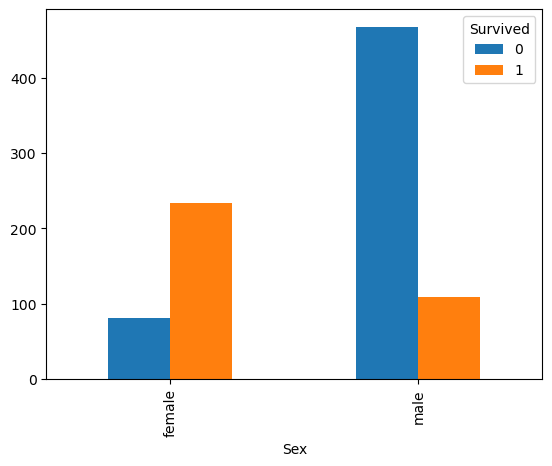

In [16]:
#성별과 생존자 수를 기준으로 그래프 그리기

su= titanic_df.groupby(['Sex', 'Survived']).size().unstack()
#e다중 인덱스인 경우 인덱스 중 하나를 열로 변환하여 데이터를 보기 쉽게 변환 가능
print(su)

su.plot(kind = 'bar')
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

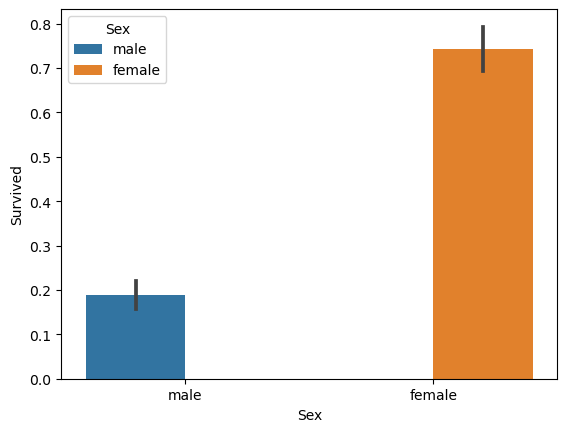

In [17]:
#seaborn은 데이터 프레임과 x,y를 넣어주면 알아서 그래프를 그려줌
#성별과 생존자수를 기준으로 그래프 그리기
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df , hue = 'Sex')

<Axes: xlabel='Pclass', ylabel='Survived'>

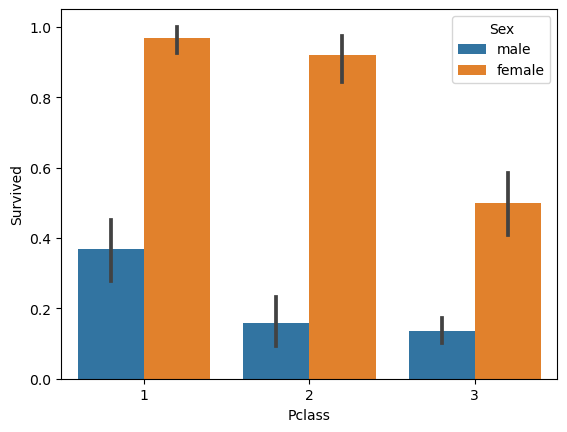

In [18]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)


In [19]:
#나이에 따른 카테고리 생성
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5:
        cat = 'baby'
    elif age <=12:
        age = 'child'
    elif age <= 25:
        cat = 'student'
    elif age <= 35:
        cat = 'young adult'
    elif age <= 80:
        cat = 'adult'
    else:
        cat = 'elderly'
    return cat

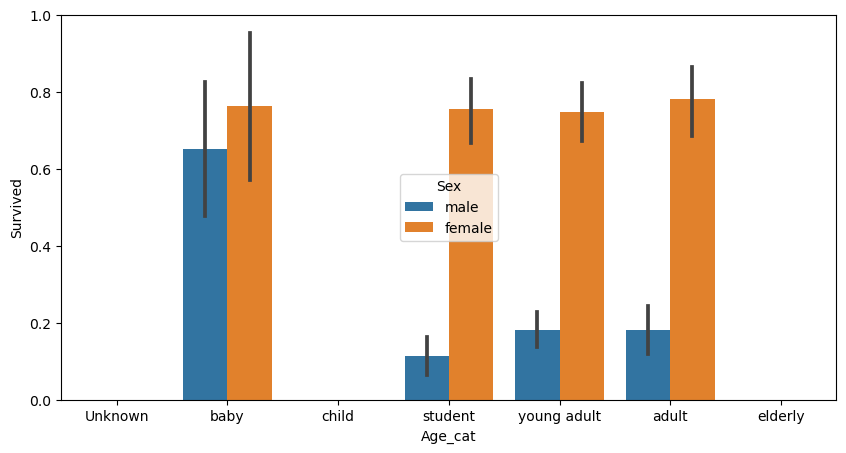

In [20]:
plt.figure(figsize = (10,5))

group_name = ['Unknown','baby','child','student','young adult','adult','elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)
#titanic_df
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

age = sns.barplot(x='Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_name)




In [21]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,young adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,young adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,N,Q,young adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E,S,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,N,S,baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,N,S,young adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,N,C,student


<Axes: xlabel='Fare', ylabel='Count'>

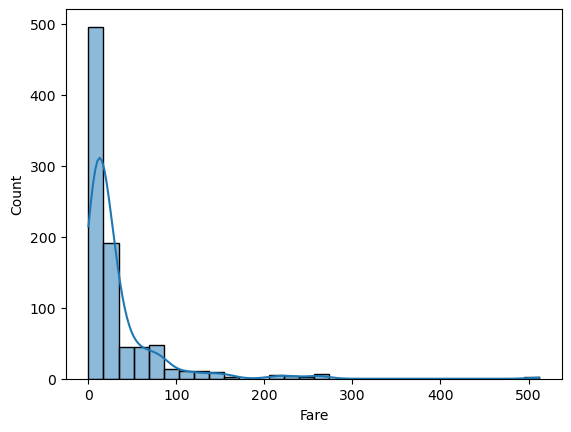

In [22]:
#가족 or 동승자수와  생존여부에 따른 막대그래프
# titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
# titanic_df.head()
# sns.barplot(data = titanic_df, y = 'Survived', x = 'Family')

#선실등급과 생존여부에 따른 막대그래프
# sns.barplot(data=titanic_df, x='Pclass', y="Survived")


#탑승 요금 분포 그래프
sns.histplot(data=titanic_df, x='Fare', bins = 30, kde = True)